In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

path = 'C:/SandBox/Prosperity/first-round/data/prices_round_1_day_-1.csv'

In [2]:
df = pd.read_csv(path, sep=';')
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0


In [3]:
amethyst_df = df[df['product'] == 'AMETHYSTS']
starfruit_df = df[df['product'] == 'STARFRUIT']

In [4]:
# Create a new column for the emwa
amethyst_df['ewma'] = amethyst_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
starfruit_df['ewma2'] = starfruit_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
starfruit_df['ewma05'] = starfruit_df['mid_price'].ewm(alpha=0.08, adjust=False).mean()


C:\Users\daksh\AppData\Local\Temp\ipykernel_18904\3615133488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethyst_df['ewma'] = amethyst_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
C:\Users\daksh\AppData\Local\Temp\ipykernel_18904\3615133488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['ewma2'] = starfruit_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
C:\Users\daksh\AppData\Local\Temp\ipykernel_18904\3615133488.py:4: SettingWithCopyWarning: 
A value is trying to be s

(0.0, 1049895.0)

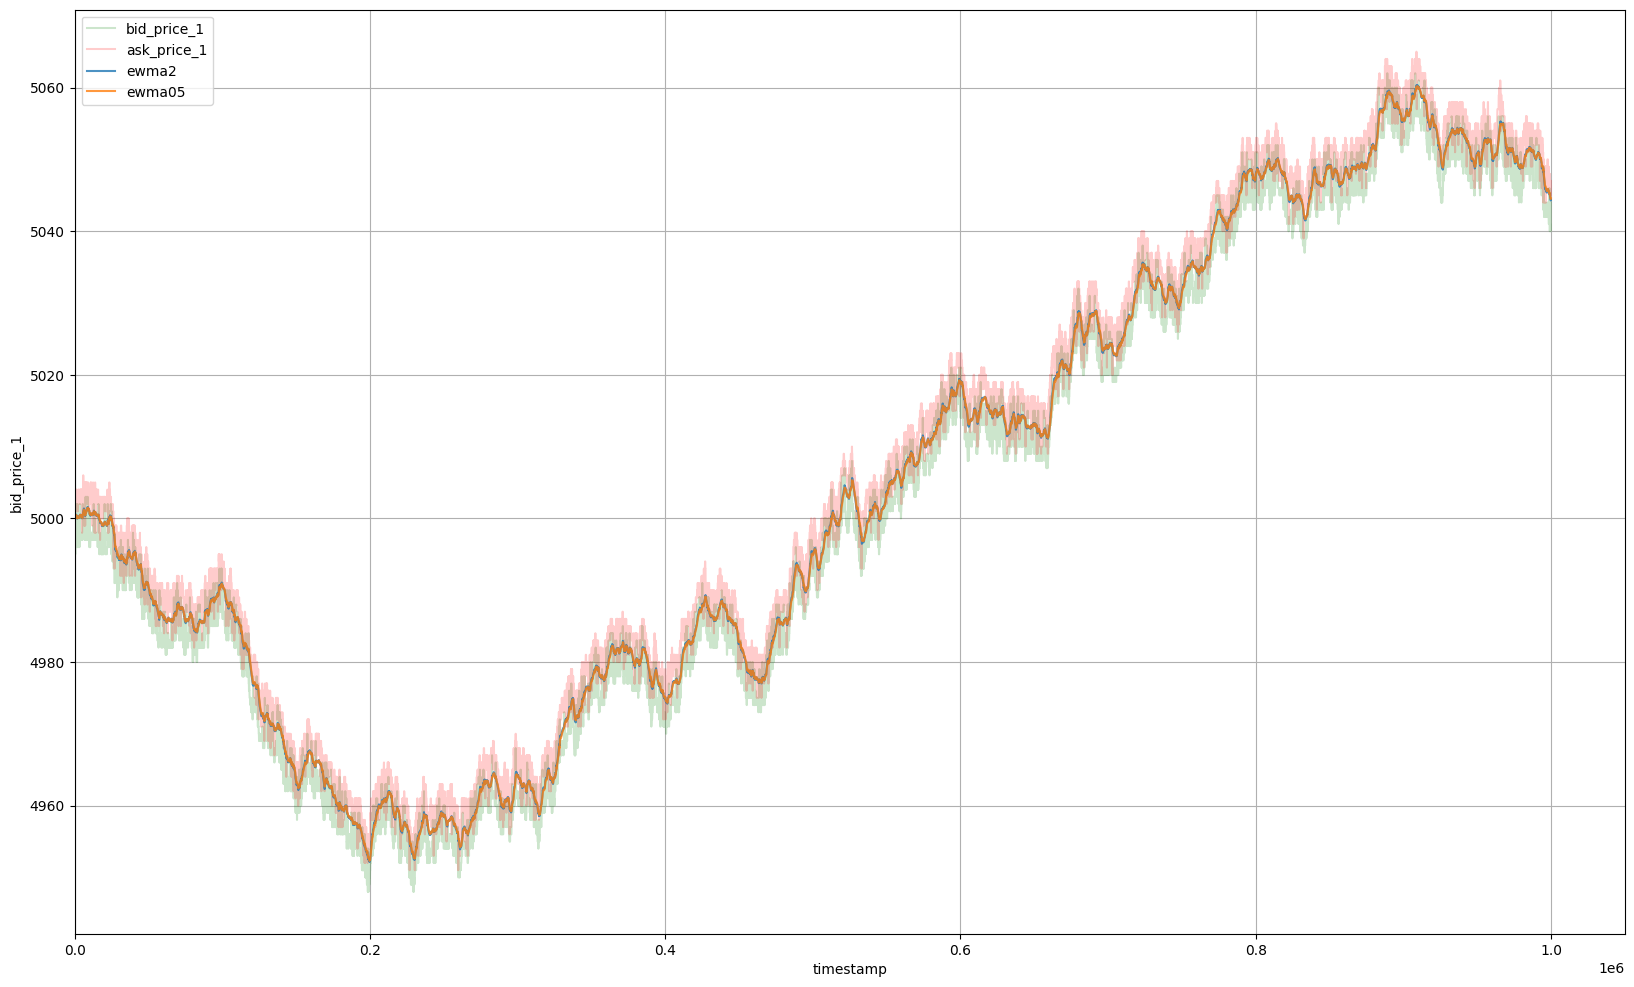

In [5]:
plt.figure(figsize=(20, 12))
plt.grid(True)
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.2, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.2, color="red")
# sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.3)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma2", errorbar=None, label="ewma2", alpha=0.8)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma05", errorbar=None, label="ewma05", alpha=0.8)
plt.xlim(0)
# plt.ylim(4940, 5020)

In [6]:
starfruit_df['BUYSIGNAL'] = starfruit_df['ewma2'] > starfruit_df['ewma05'] + 0.1

starfruit_df['SELLSIGNAL'] = starfruit_df['ewma2'] < starfruit_df['ewma05'] - 0.1

C:\Users\daksh\AppData\Local\Temp\ipykernel_18904\1871417558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['BUYSIGNAL'] = starfruit_df['ewma2'] > starfruit_df['ewma05'] + 0.1
C:\Users\daksh\AppData\Local\Temp\ipykernel_18904\1871417558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['SELLSIGNAL'] = starfruit_df['ewma2'] < starfruit_df['ewma05'] - 0.1


<Axes: xlabel='timestamp', ylabel='bid_price_1'>

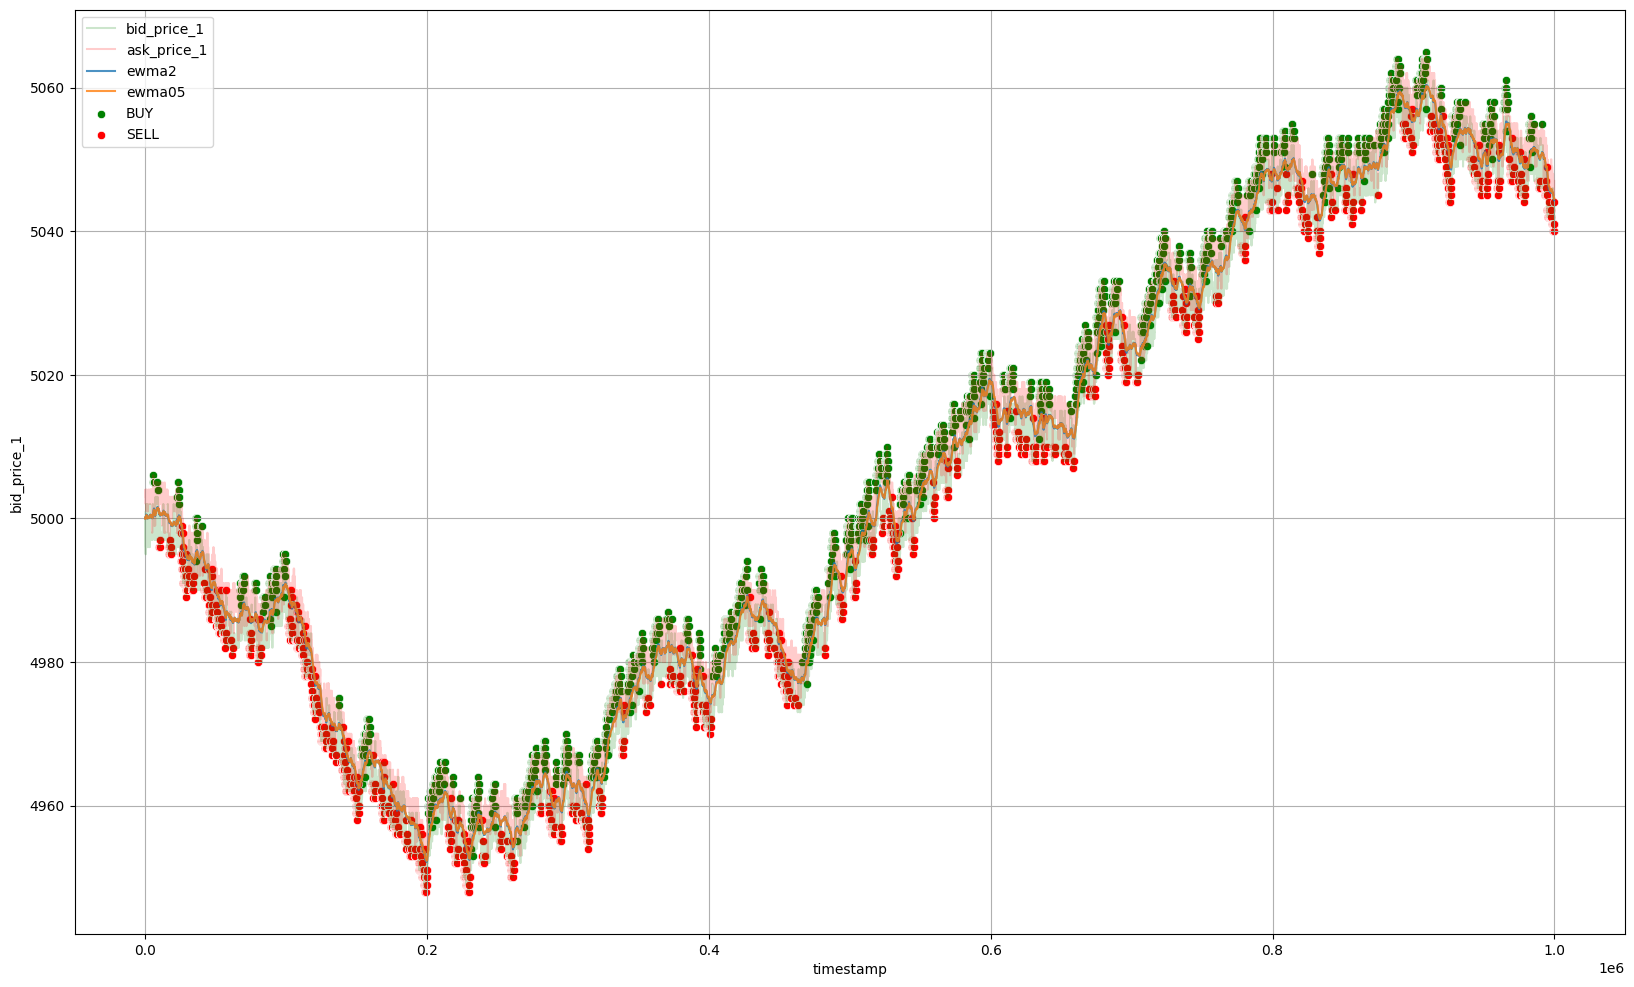

In [7]:
plt.figure(figsize=(20, 12))
plt.grid(True)
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.2, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.2, color="red")
# sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.3)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma2", errorbar=None, label="ewma2", alpha=0.8)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma05", errorbar=None, label="ewma05", alpha=0.8)
sns.scatterplot(data=starfruit_df[starfruit_df['BUYSIGNAL']], x="timestamp", y="ask_price_1", color="green", label="BUY")
sns.scatterplot(data=starfruit_df[starfruit_df['SELLSIGNAL']], x="timestamp", y="bid_price_1", color="red", label="SELL")

In [8]:
pnl = 0
position = 0
trades = 0

# Buy signals
for index, row in starfruit_df[starfruit_df['BUYSIGNAL']].iterrows():
    buy_price = row['ask_price_1']
    sell_price = row['bid_price_1']
    pnl -= buy_price
    position += 1
    trades += 1
    
# Sell signals
for index, row in starfruit_df[starfruit_df['SELLSIGNAL']].iterrows():
    sell_price = row['bid_price_1']
    buy_price = row['ask_price_1']
    pnl += sell_price
    position -= 1
    trades += 1

print("Unrealised PNL:", pnl)
print("Final Position:", position)
print("Trades:", trades)
print("Final Cash:", pnl + position * starfruit_df['mid_price'].iloc[-1])


Unrealised PNL: -2162642
Final Position: 425
Trades: 5323
Final Cash: -18304.5


In [39]:
data = pd.DataFrame()
ewmas = [int(i) for i in '01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 20, 30, 40, 50, 60, 70, 80, 90'.split(',')]

for i in ewmas:
    data[str(i)] = starfruit_df['mid_price'].ewm(alpha=float(i/100), adjust=False).mean()

data['future_price'] = starfruit_df['mid_price'].shift(-1)

data = data.dropna()


In [52]:

def func(x, m, c):
    return m * x + c


for i in range(len(ewmas)):
    for j in range(i+1, len(ewmas)):
        popt, pcov = curve_fit(func, data[str(ewmas[j])] - data[str(ewmas[i])], data['future_price'] - data[str(ewmas[i])])
        print(ewmas[i], ewmas[j],  popt[0], popt[1])
# popt, pcov = curve_fit()
# print(popt)

1 2 1.9964062148746706 -0.013941530526286315
1 3 1.494180280274192 -0.009678844103306439
1 4 1.325827222805986 -0.006636597213300899
1 5 1.2410560006143811 -0.004335268652928104
1 6 1.189775215578906 -0.00252574030376862
1 7 1.1552627051883033 -0.001050925796385993
1 8 1.1303392194716888 0.00019189521777751573
1 9 1.1114094503472358 0.0012709460765200076
1 10 1.0964735715713403 0.0022322533064995653
1 20 1.0276891810733646 0.009332581904671192
1 30 0.9985578750103014 0.015380630426646613
1 40 0.9777199970947027 0.02154445427801844
1 50 0.9592960705059965 0.028124436133860203
1 60 0.9412496898977504 0.035293020223521716
1 70 0.9225610931176471 0.04320342301334901
1 80 0.9025343951633547 0.05202415099048452
1 90 0.8805555691487783 0.06195887600534175
2 3 2.959565169497595 -0.005092957599388326
2 4 1.9664970915820659 -0.002662805401717927
2 5 1.6340803016079357 -0.0008344635748496199
2 6 1.4669248453916186 0.0005992498029935289
2 7 1.3658979817944772 0.001770994600353498
2 8 1.29793472331

<Axes: xlabel='30', ylabel='future_price'>

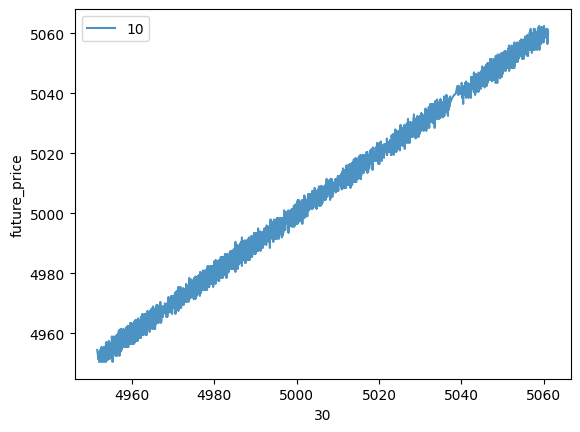

In [45]:
sns.lineplot(data=data, x="30", y="future_price", errorbar=None, label="30", alpha=0.8)
